In [1]:
# plotting
import matplotlib.pylab as plt
import matplotlib as mpl

# statistics
import numpy as np
import pandas as pd

# tensorflow
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# scikit
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import sys
from os.path import expanduser
home = expanduser("~")

sys.path.append(home+'/repos/ClusNet/code/modules/')

from ClusNet import Cluster
from ClusNet import model as m

from glob import glob
import os

In [2]:
modelpath = '../../models/category/xrDzP'
model = keras.models.load_model(modelpath)

In [38]:
tr_paths = pd.read_csv(modelpath + '/tr_paths.txt',names=['path'])
val_paths = pd.read_csv(modelpath + '/val_paths.txt',names=['path'])

tr_paths['clus_bool'] = tr_paths['path']!='noise'
tr_paths['clus_bool'] = tr_paths['clus_bool'].astype(int)

val_paths['clus_bool'] = val_paths['path']!='noise'
val_paths['clus_bool'] = val_paths['clus_bool'].astype(int)

print(tr_paths)

                                                   path  clus_bool
0     /home-1/bgalgan1@jhu.edu/repos/ClusNet/data/eR...          1
1                                                 noise          0
2     /home-1/bgalgan1@jhu.edu/repos/ClusNet/data/eR...          1
3                                                 noise          0
4     /home-1/bgalgan1@jhu.edu/repos/ClusNet/data/eR...          1
...                                                 ...        ...
2993  /home-1/bgalgan1@jhu.edu/repos/ClusNet/data/eR...          1
2994                                              noise          0
2995                                              noise          0
2996                                              noise          0
2997  /home-1/bgalgan1@jhu.edu/repos/ClusNet/data/eR...          1

[2998 rows x 2 columns]


In [53]:
x_train = []
x_m500 = []
for x_path in tr_paths['path']:
    x = None
    if x_path == 'noise':
        # BLANK with noise
        x = Cluster.Cluster(fpath=None)
        x.add_noise()
        x_m500.append(np.nan)
        image = x.image
        x_train.append(x.image)
        
        #print('Noise:')

    else:
        # no BLANK
        fname = os.path.basename(x_path)
        x_path = '../../data/eROSITA_no_background/'
        x = Cluster.Cluster(fpath=x_path + fname)
        x.add_noise()
        
        #print('Cluster present:')
        x_m500.append(x.M500)
        image = x.image
        x_train.append(x.image)


x_train = np.array(x_train)
x_train = x_train.reshape(-1, 384, 384, 1)

truth = tr_paths['clus_bool'].to_numpy()

x_m500 = np.array(x_m500)

In [54]:
print(x_train.shape)

(2998, 384, 384, 1)


In [55]:
pred = model.predict(x_train,verbose=1)  
pred = pred.flatten()

94/94 [==============================] - 15s 158ms/step


In [56]:
for test_, pred_ in zip(truth,pred):
    print('truth:', test_,'pred:', pred_)

truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 0 pred: 1.0
truth: 1 pred: 1.0
truth: 1 pre

1.0


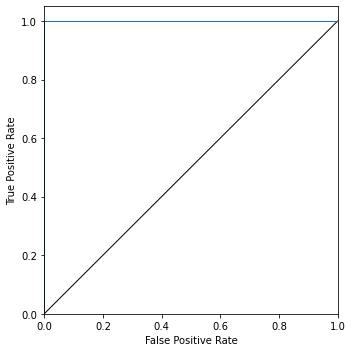

In [49]:
plt.figure(figsize=[5,5])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(truth, pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

roc = roc_auc_score(truth, pred)
print(roc)
plt.plot(fpr[1], tpr[1],lw=1)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k',lw=1,zorder=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
#plt.savefig('roc_binary_classifer.png',dpi=300,bbox_inches='tight')
plt.show()

In [50]:
#print(min(x_m500),max(x_m500))
bins = np.arange(13.5,15.01,0.25)

low_mask = x_m500 < 13
high_mask = x_m500 > 14
print(low_mask)


plt.figure(figsize=[5,5])

for mask,mask_label in zip([low_mask,high_mask],['Low Mass','High Mass']):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    truth = truth[mask]
    pred = pred[mask]
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(truth, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])

    roc = roc_auc_score(truth, pred)
    plt.plot(fpr[1], tpr[1],lw=1,label=mask_label)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k',lw=1,zorder=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
#plt.savefig('roc_binary_classifer.png',dpi=300,bbox_inches='tight')
plt.show()



[False False False ... False False False]


ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 360x360 with 0 Axes>

In [33]:
groups = df.groupby(['M500', cuts])
print(groups.size().unstack())

M500       (13.5, 13.75]  (13.75, 14.0]  (14.0, 14.25]  (14.25, 14.5]  \
M500                                                                    
13.500118              2              0              0              0   
13.500378              3              0              0              0   
13.501841              2              0              0              0   
13.502050              2              0              0              0   
13.503577              1              0              0              0   
...                  ...            ...            ...            ...   
14.695324              0              0              0              0   
14.701878              0              0              0              0   
14.769311              0              0              0              0   
14.782250              0              0              0              0   
14.782919              0              0              0              0   

M500       (14.5, 14.75]  (14.75, 15.0]  
M500    